In [1]:
# Fitting in packages and libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from sklearn import metrics

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
# loading the dataset
data = pd.read_csv('Live_20210128.csv')

In [4]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
data.shape

(7050, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [7]:
missing = data.isnull().sum()

print(missing)

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [8]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [9]:
missing = data.isnull().sum()

print(missing)

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [11]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [12]:
# labels in the variable

data['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [13]:
# view how many different types of variables are there

len(data['status_id'].unique())

6997

In [14]:
# labels in the variable

data['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [15]:
# view how many different types of variables are there

len(data['status_published'].unique())

6913

In [16]:
# labels in the variable

data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [17]:
# view how many different types of variables are there

len(data['status_type'].unique())

4

In [18]:
data.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [19]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['status_type'] = label_encoder.fit_transform(data['status_type'])

In [21]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


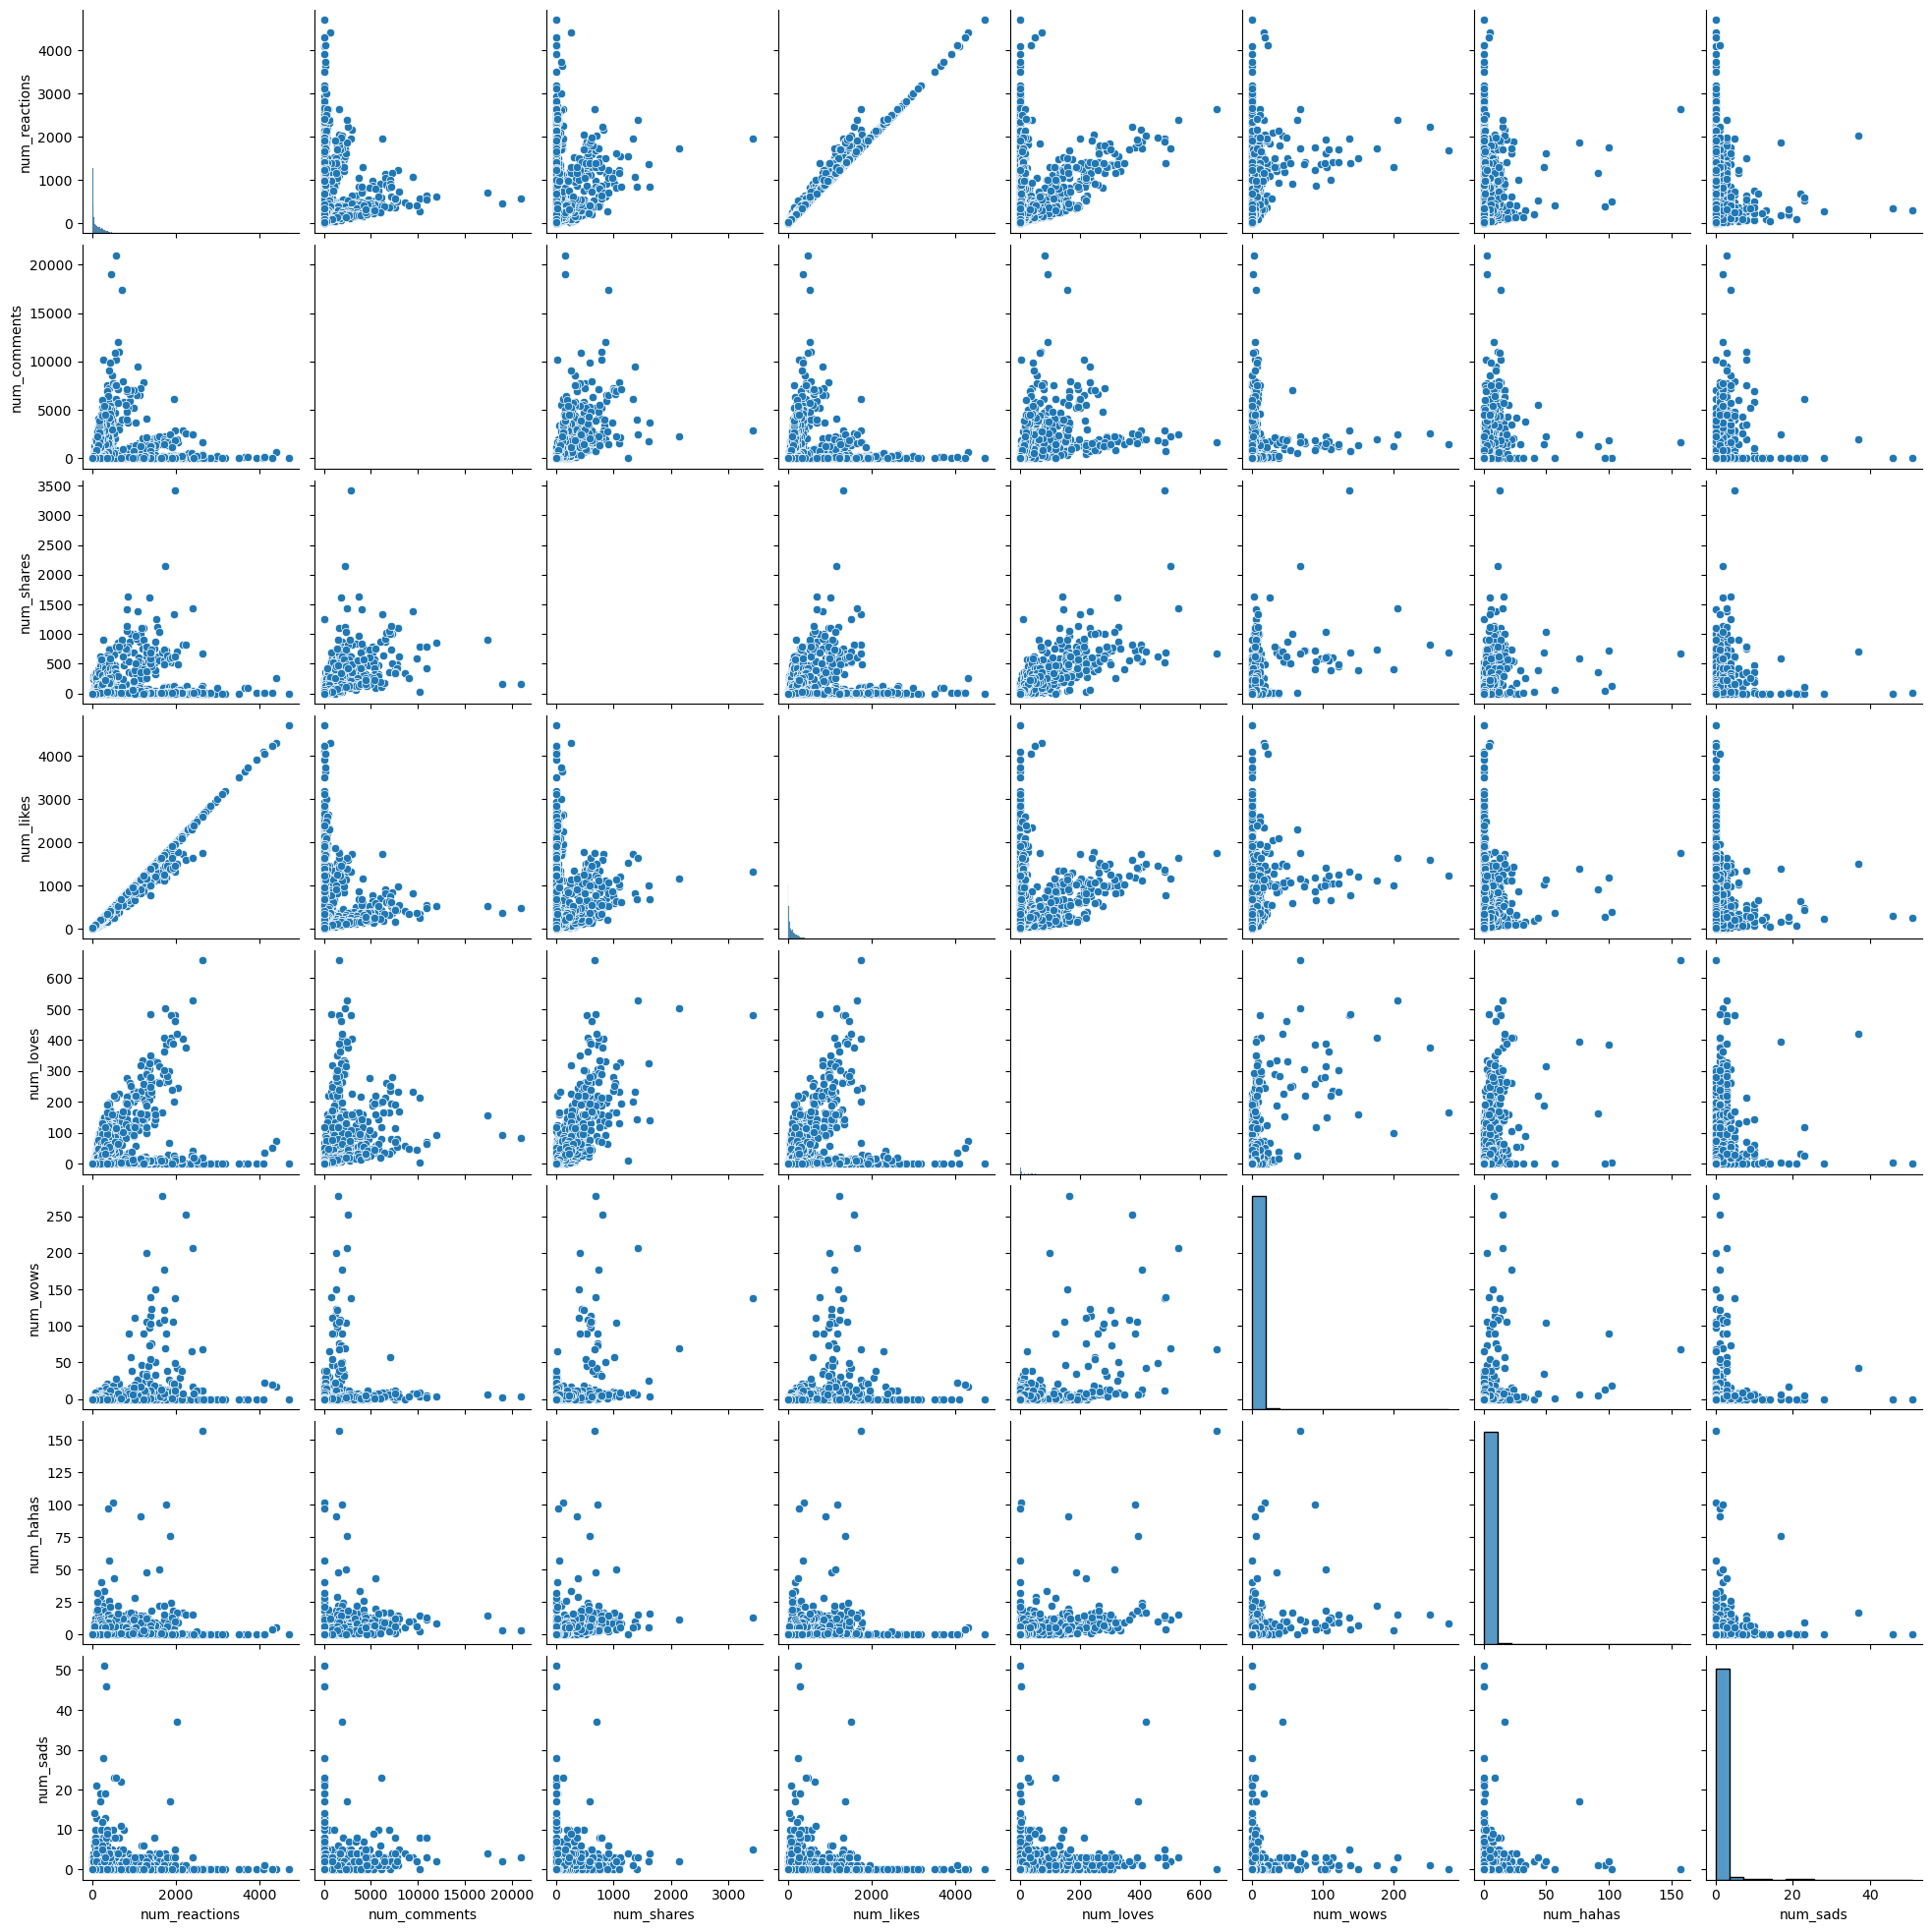

In [22]:
data = data.iloc[:,1:9]
sns.pairplot(data)

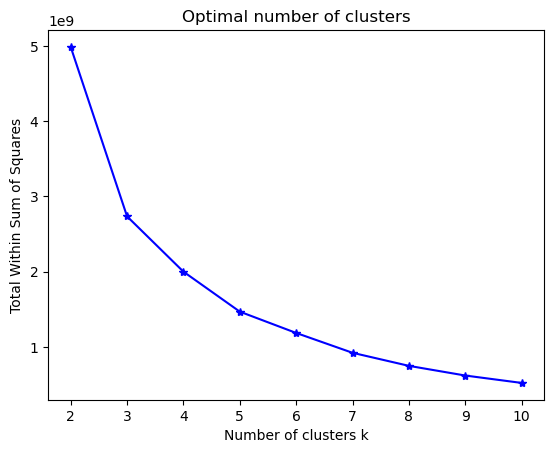

In [23]:
# Using elbow method to find optimal number of clusters

wss = []

K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(data)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

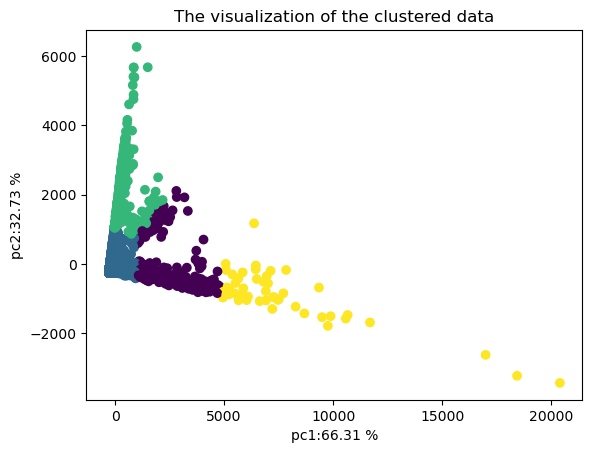

In [24]:
# Visualizing K-means

pca = PCA()
pca_data = pca.fit_transform(data)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(data.columns))])


pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=4, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

In [25]:
# second way for k-means clustering
clustering_kmeans = KMeans(n_clusters=2)
data['Clusters'] = clustering_kmeans.fit_predict(data)

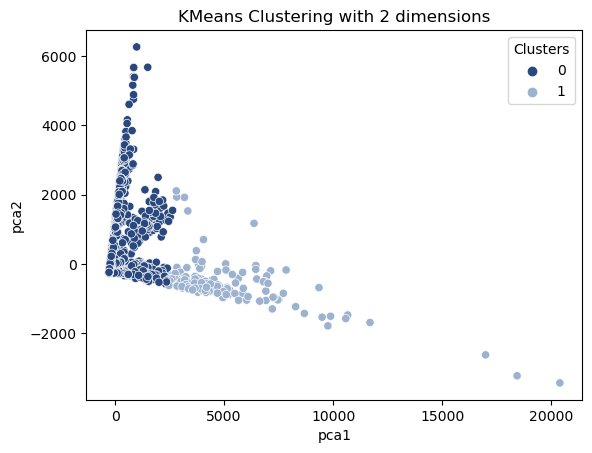

In [26]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
pal = ["#29487D", "#9CB2CE"]

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()

In [27]:
# choosing the best number of clusters using the silhouette score

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_

    Kmeans_score = metrics.silhouette_score(data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, Kmeans_score))

For n_clusters = 2, silhouette score is 0.872192332064364)
For n_clusters = 3, silhouette score is 0.8121444771497328)
For n_clusters = 4, silhouette score is 0.8175654716481884)
For n_clusters = 5, silhouette score is 0.7851654545545365)
For n_clusters = 6, silhouette score is 0.761540043706538)
For n_clusters = 7, silhouette score is 0.7610441429768717)
For n_clusters = 8, silhouette score is 0.760021132427097)
For n_clusters = 9, silhouette score is 0.6574500439875575)


In [28]:
# DBSCAN clustering
clustering_kmeans = DBSCAN()
data['Clusters'] = clustering_kmeans.fit_predict(data)

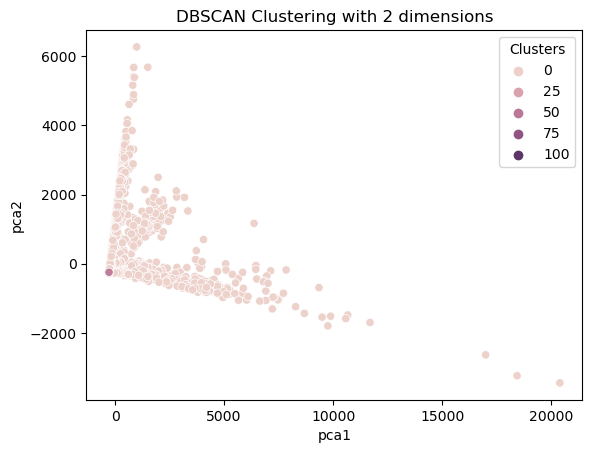

In [29]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['Clusters'], data=results)
plt.title('DBSCAN Clustering with 2 dimensions')
plt.show()

In [30]:
db = DBSCAN(eps=13, min_samples=15).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

Estimated number of clusters: 3
Estimated number of noise points: 2176
Silhouette Coefficient: 0.337


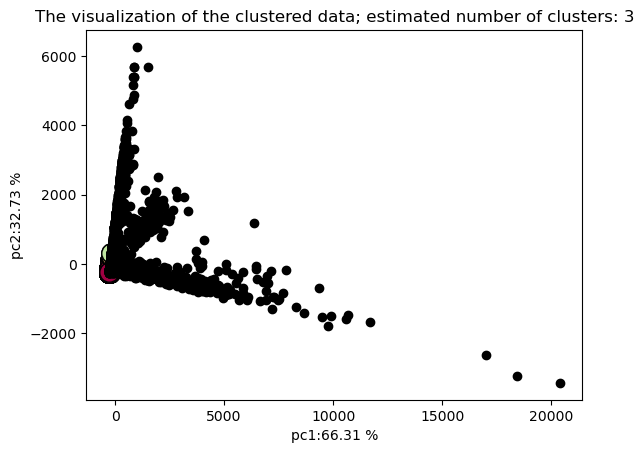

In [31]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_data1[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data1[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('The visualization of the clustered data; estimated number of clusters: %d' % n_clusters_)
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()